In [1]:
#信用卡欺诈分类器
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

data = pd.read_csv("creditcard.csv")
data.head()

from sklearn.preprocessing import StandardScaler

#标准化数据，去除时间特征
data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data = data.drop(['Time','Amount'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [2]:

#把数据特征分为输入X，和输出Y
x = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

# 实现下采样方法，运用np数据结构实现，这里给出的代码比较详细，也可使用sklearn中的数据处理的函数进行处理
# Number of data points in the minority class
number_records_fraud = len(data[data.Class == 1])  #欺诈样本的数量
fraud_indices = np.array(data[data.Class == 1].index)  #欺诈样本的索引

# Picking the indices of the normal classes
normal_indices = data[data.Class == 0].index   #非欺诈样本的索引

# Out of the indices we picked, randomly select "x" number (number_records_fraud)
# 対欺诈样本实行随机抽样  抽样量与负样本相同

#从非欺诈样本中随机抽取与欺诈样本量的索引的索引数，注意这里是replace = false是无放回采样
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

# Appending the 2 indices  将欺诈样本与非欺诈样本的索引结合起来
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

# Under sample dataset  根据索引选择下采样的样本
under_sample_data = data.iloc[under_sample_indices,:]

X_undersample = under_sample_data.iloc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'Class']

# 查看下采样后的正负样本数量
print("Percentage of normal transactions: ", len(under_sample_data[under_sample_data.Class == 0])/len(under_sample_data))
print("Percentage of fraud transactions: ", len(under_sample_data[under_sample_data.Class == 1])/len(under_sample_data))
print("Total number of transactions in resampled data: ", len(under_sample_data))

Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in resampled data:  984


In [3]:
X = data.ix[:, data.columns != 'Class']
y = data.ix[:, data.columns == 'Class']

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


Text(0, 0.5, 'Count')

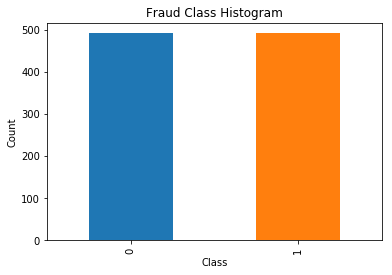

In [4]:
#使用已有的包进行下采样

from imblearn.under_sampling import RandomUnderSampler 

# 建立RandomUnderSampler模型对象
model_RandomUnderSampler = RandomUnderSampler() 
# 输入数据并作下采样
x_RandomUnderSampler_resampled, y_RandomUnderSampler_resampled =model_RandomUnderSampler.fit_sample(x,y) 
count_class = pd.value_counts(y_RandomUnderSampler_resampled.ravel() , sort = True).sort_index()
count_class.plot(kind = 'bar')
plt.title("Fraud Class Histogram")
plt.xlabel("Class")
plt.ylabel("Count")
#如图 实现正负样本量均衡

In [5]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

# 分割训练集、测试集的输入和输出，测试集占比0.3
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

# Undersampled dataset  下采样数据集进行分割
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample
                                                                                                   ,y_undersample
                                                                                                   ,test_size = 0.3
                                                                                                   ,random_state = 0)
print("")
print("Number transactions train dataset: ", len(X_train_undersample))
print("Number transactions test dataset: ", len(X_test_undersample))
print("Total number of transactions: ", len(X_train_undersample)+len(X_test_undersample))

Number transactions train dataset:  199364
Number transactions test dataset:  85443
Total number of transactions:  284807

Number transactions train dataset:  688
Number transactions test dataset:  296
Total number of transactions:  984


In [8]:
#朴素贝叶斯分类
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_undersample, y_train_undersample)
print(gnb)

GaussianNB(priors=None, var_smoothing=1e-09)


E:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
from sklearn.metrics import confusion_matrix,recall_score,classification_report 
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

E:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall metric in the testing dataset:  0.8231292517006803


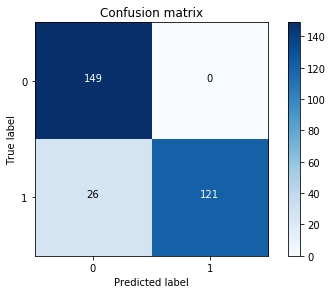

In [13]:
#在验证集上进行验证
import itertools

gnb = GaussianNB()
gnb.fit(X_train_undersample, y_train_undersample)
y_pred_undersample = gnb.predict(X_test_undersample.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_undersample,y_pred_undersample)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [14]:
#打印所有评估值
import sklearn.model_selection as sk_model_selection
df_1= np.array(X_train_undersample)
df_2= np.array(y_train_undersample)
#选择gnb模型
gnb_model = GaussianNB()
#打印AUC、召回率、准确率、精确率、F1值等
estimate_index = ['roc_auc','recall',None,'precision','f1']
for index in estimate_index:
    ix = sk_model_selection.cross_val_score(gnb_model, X_train_undersample, y=y_train_undersample.values.flatten(), scoring=index, cv=5)
    print(str(index) + ":   "+ str(np.mean(ix)))

roc_auc:   0.9544386374587642
recall:   0.8608695652173914
None:   0.9142811805775943
precision:   0.9655638065828492
f1:   0.9094104212909215


第1次训练
accuracy:0.9130434782608695
约登指数: 0.9764590541794123
***************

第2次训练
accuracy:0.8985507246376812
约登指数: 1.1734658586346541e-06
***************

第3次训练
accuracy:0.9057971014492754
约登指数: 1.4116243617740058e-08
***************

第4次训练
accuracy:0.927007299270073
约登指数: 0.9951044332876604
***************

第5次训练
accuracy:0.927007299270073
约登指数: 0.9999999997595808
***************



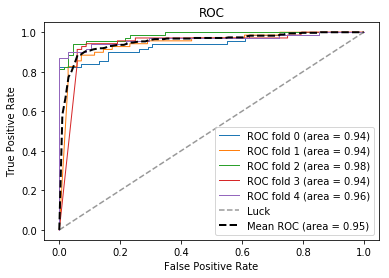

In [15]:
import sklearn.model_selection as sk_model_selection
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
from scipy import interp

df_1= np.array(X_train_undersample)
df_2= np.array(y_train_undersample)

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []
i=0
adjustthresholds = 0
yuedeng = 0


#选择GNB模型
gnb_model = GaussianNB()

# 画ROC曲线
for train, test in StratifiedKFold(n_splits=5).split(df_1, df_2):
    print('第'+str(i+1)+'次训练')
    # 通过训练数据，使用svm线性核建立模型，并对测试集进行测试，求出预测得分
    probas = gnb_model.fit(df_1[train], df_2[train].flatten()).predict_proba(df_1[test])

    result = {"probas": probas[:, 1], "fact":df_2[test] }

    result={'probas' : list(result['probas']),'fact' : list(result['fact'])}
    result = pd.DataFrame(result)
    result['pred'] = result.probas.apply(lambda x: 1 if x>=0.5 else 0)
    accuracy = (result[result['pred']==result['fact']].shape[0])/(result.shape[0])
    
    print('accuracy:'+str(accuracy))


    # 通过roc_curve()函数，求出fpr和tpr，以及阈值
    fpr, tpr, thresholds = roc_curve(df_2[test], probas[:, 1])


    print('约登指数: '+ str(np.min(thresholds[np.argwhere((tpr - fpr) == max(tpr-fpr))])))

    yuedeng += np.min(thresholds[np.argwhere((tpr - fpr) == max(tpr-fpr))])
    #adjustthresholds += max(thresholds[np.argwhere(tpr >0.90)])
    print("***************")
    print("")
    mean_tpr += interp(mean_fpr, fpr, tpr)  # 对mean_tpr在mean_fpr处进行插值，通过scipy包调用interp()函数
    mean_tpr[0] = 0.0  # 初始处为0
    roc_auc = auc(fpr, tpr)
    # 画图，只需要plt.plot(fpr,tpr),变量roc_auc只是记录auc的值，通过auc()函数能计算出来
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
    i = i+1

# print("yuedeng"+str(gedeng/5))
# print("adjust"+str(adjustthresholds/5))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')


mean_tpr /= 5 # 在mean_fpr100个点，每个点处插值插值多次取平均
mean_tpr[-1] = 1.0  # 坐标最后一个点为（1,1）
mean_auc = auc(mean_fpr, mean_tpr)  # 计算平均AUC值
# 画平均ROC曲线
# print mean_fpr,len(mean_fpr)
# print mean_tpr
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()